# Plotting McCabe-Thiele diagram through computational methods

Prepared by:

Zeping Chen - zchen23@nd.edu

Suporna Paul - spaul2@nd.edu

Steven Yeo - syeo@nd.edu

## 1. Introduction

Do you ever find yourself frustrated with the painstaking process of manually sketching McCabe-Thiele diagrams? Have you ever questioned whether there's a more efficient and precise approach, especially when dealing with the intricacies of the operating line and stepping lines? We will embark on a journey that combines data science and chemical engineering to improve separation processes! In this notebook, we'll delve into harnessing the power of Python to streamline the McCabe-Thiele diagram plotting process, making it not only simpler but also more data-centric and accurate, whilst giving special attention to the construction of the operating line and stepping lines.

## 1.1 Target audience and learning objectives


This notebook is intended for Chemical Engineering students (both undergraduates and graduate students) who have completed or are currently enrolled in a Chemical Engineering Separations Process class.

After studying this notebook, completing the activities, and asking questions in class, you should be able to:

*   Use numpy to solve system of linear equations
*   Use pandas to read csv
*   Produce "publication ready" plots
*   Graph the McCabe-Thiele diagram using computational techniques


## 1.2 Relevant notebooks from the class:


1.15. [Preparing Publication Quality Figures in Python](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html)

1.3. [Modeling Systems of Linear Equations](https://ndcbe.github.io/data-and-computing/notebooks/01/Python-Basics-III-Lists-Dictionaries-Enumeration.html)

1.5.[Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)

4.1. [Python Basics II: Loopy Logic](https://ndcbe.github.io/data-and-computing/notebooks/01/Flow-control.html)

14.7. [Multivariate Linear Regression](https://ndcbe.github.io/data-and-computing/notebooks/14/Multivariate-Linear-Regression.html)

## 1.3 References:
1. McCabe-Thiele Plot | Neutrium. https://neutrium.net/unit-operations/distillation/mccabe-thiele-plot/ (accessed 2022-10-15


2. Vapor-Liquid Equilibrium (VLE) Model for vapor mole frac methanol and liquid mole frac methanol. https://raw.githubusercontent.com/chennieXD/McCabe-Thiele/main/LiquidVaporEquil.csv (accessed 2022-10-15).

3. Stichlmair, G.; Klein, H.; Rehfeldt, S. Distillation: Principles and Practice, 2nd ed.; Wiley, 2021.

4. Gorak, A.; Sorensen, E.  Distillation: Fundamentals and Principles (Handbooks in Separation Science), 1st ed.; Academic Press, 2014.

## 1.4 Background information

### Distillation
Distillation is a widely used separation technique that exploits the differences in the boiling points of components within a liquid mixture. The process involves heating a liquid mixture to create vapor, and then cooling that vapor to condense it back into a liquid, separating the components in the process. Distillation can be used to separate two or more components from a mixture based on their volatility, which is determined by their boiling points.

###Components of a Distillation Column:

A distillation column is a tall vertical vessel. Consists of several components

1. **Reboiler**: Where the liquid feed is heated to create vapor. This is in the bottom of the column
2. **Distillation Trays or packing**: Stages inside the column. this is designed to facilitate contact between vapor and liquid
3. **Condenser**: Cools the vapor to condense back to liquid at the top of the tower

Key Operating Parameters:

1. **Temperature**: Temperature gradient allows for components with different boiling point to separate
2. **Pressure**: Changes along the column's height. In this problem, we assume that it's constant
3. **Vapor and Liquid flow Rates**: Flow rate of vapor and liquid in the columns
4. **Reflux Ratio**: The portion of the condensed liquid returned to the column as liquid

## 2. Solving distillation column using McCabe-Thiele method

In [2]:
# libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### **Problem description**

A student is trying to calculate the number of stages in a distillation column. Since there is insulation installed to improve the efficiency of the column, he can not just count the number of stages physically. To figure out the number of stages, he is feeding a methanol-water mixture into the column to observe how the column performs. Using a hydrometer, the student is able to measure the specific gravity of the feed: 0.887, distillate: 0.815 and bottoms: 0.990. He is also able to measure the reflux ratio to be 1.25 and the feed has a liquid mole fraction of 0.36.

Using the above information:
1. Calculate the mole fraction  of each stream from specific gravity
2.  Plot the vapor liquid equilibrium line and 45 degree line.
3.  Plot the McCabe-Thiele diagram for a total reflux run for the mixture and calculate the number of stages.
4.  Plot the McCabe-Thiele diagram for a feed run for the mixture and calculate the number of stages.
5. Discuss what the McCabe-Thiele diagram tells you about the feed condiiton
6. Discuss how a McCabe-Thiele plot with 100% efficiency is unrealistic.

**Note:** This problem is developed by Zeping Chen and Suporna Paul. Here, we demostrated a step by step process of using this python notebook to solve for distillation column parameters.

For further information, readers are encouraged to read these following text books which contains similar math problems.

**References:**

1. Stichlmair, G.; Klein, H.; Rehfeldt, S. Distillation: Principles and Practice, 2nd ed.; Wiley, 2021.
2. Gorak, A.; Sorensen, E.  Distillation: Fundamentals and Principles (Handbooks in Separation Science), 1st ed.; Academic Press, 2014.



## 2.1. Solve for mole fraction of each stream

We can rearrange the definition of specific gravity (SG) to get the density of mixture in each stream:


\begin{align}
        SG = \frac{density \ of \ mixture}{density \ of \ water}
    \end{align}

We also know that the density (ρ) of a mixture can be calculated by summing the mole fraction (X) of each component by that component's density.

\begin{align}
        ρ_t = ρ_a X_a + ρ_b X_b
    \end{align}


From these information, we can write a system of linear equations to calculate the mole fraction of methanol and water in each stream:


\begin{align}
        1 = X_W + X_M
    \end{align}
    
\begin{align}
        ρ_t = ρ_M X_M + ρ_W X_W
    \end{align}


**Calculate the mole fraction of methanol in each stream** by solving the above system of equations by hand. Record Your answer on pencil and paper**

## 2.1.a. Obtaining density of mixture through specific gravity

The density of each component is given as below:
*   Water: 997 kg/m$^3$
*   Methanol: 792 kg/m$^3$

In [3]:
# Density of each species

# Water
rho_water = 997  # kg/m^3
# Methanol
rho_methanol = 792  # kg/m^3

## 2.1.b. Create a function to solve  Linear System

An easier method to calculate the mole fraciton of Methanol in each stream is to use linear algebra.

Matrix form:
$$
\begin{equation}
\begin{bmatrix}
ρ_W & ρ_M\\
1 & 1
\end{bmatrix} \cdot
\begin{bmatrix}
	X_W \\
	X_M
\end{bmatrix} =
\begin{bmatrix}
	ρ_t \\
	1
\end{bmatrix}
\end{equation}
$$


Now let's write a function that will solve the linear system of equations to obtain the mole fraction of Methanol in each stream **using Python**.

In [4]:
def conc_solver(SG):
    ### BEGIN SOLUTIONS

    """calculates the mole fraction of Methanol in the stream by solving one variable in one equation

    Arguments:
        SG: specfic gravity

    Returns:
        x: molar fraction of Methanol
    """

    # the left matrix above
    a = np.array([[rho_water, rho_methanol], [1, 1]])

    # the right matrix above
    b = np.array([SG * rho_water, 1])

    #mole fraction for each component
    x = np.linalg.solve(a, b)

    #mole fraction of metanol
    x_methanol = x[1]

    return x_methanol

    ### END SOLUTIONS

The specific gravity of each stream (Feed, Distillate, Bottoms) is given as below:
*   $SG_Z$ = 0.887
*  $SG_D$ = 0.815
*   $SG_B$ = 0.990

In [5]:
# Specify the Specific Gravity of each stream

### BEGIN SOLUTIONS

# Specific Gravity of feed
SG_Z = 0.887

# Specific Gravity of distillate
SG_D = 0.815

# Specific Gravity of bottoms
SG_B = 0.990

### END SOLUTIONS

## 2.1.c. Solve for the mole fraction of Methanol in each stream

Using the function created previously to calculate and print the mole fraction of Methanol in each stream:

Use **$x_D$** for the distillate stream

Use **$x_B$** for the bottom stream

Use **$x_Z$** for the feed stream

In [31]:
# calculate the molar fraction of each stream
### BEGIN SOLUTIONS

# Mole fraction of Feed
xZ = float(conc_solver(SG_Z))

# Mole fraction of Distillate
xD = float(conc_solver(SG_D))

# Mole fraction of Bottoms
xB = float(conc_solver(SG_B))


print("The molar fraction of Methanol in the distillate stream is: %1.3f" % xD)
print("The molar fraction of Methanol in the bottoms stream is: %1.3f" % xB)
print("The molar fraction of Methanol in the feed stream is: %1.3f" % xZ)



### END SOLUTIONS

The molar fraction of Methanol in the distillate stream is: 0.900
The molar fraction of Methanol in the bottoms stream is: 0.049
The molar fraction of Methanol in the feed stream is: 0.550


## 3. Vapor-liquid equilibrium (VLE) model



## 3.1. Fit the VLE data points to create a best fit line

Using the points of VLE obtained from Aspen Plus to generate a best fit line to model VLE. **Hint:** Use Excel or Python.

In [7]:
# imports the csv data into python
url = "https://raw.githubusercontent.com/chennieXD/McCabe-Thiele/main/LiquidVaporEquil.csv"
liq_vap_data = pd.read_csv(url)
print(liq_vap_data)

    vapor mole frac methanol  liquid mole frac methanol
0                   1.000000                       1.00
1                   0.991953                       0.98
2                   0.983907                       0.96
3                   0.975858                       0.94
4                   0.967805                       0.92
5                   0.959746                       0.90
6                   0.951678                       0.88
7                   0.943597                       0.86
8                   0.935500                       0.84
9                   0.927383                       0.82
10                  0.919242                       0.80
11                  0.911073                       0.78
12                  0.902868                       0.76
13                  0.894623                       0.74
14                  0.886331                       0.72
15                  0.877983                       0.70
16                  0.869572                    

## 3.2. Vapor-liquid equilibrium of methanol

Plot the VLE of methanol using the model generated from linear regression using the format $a+bx+cx^2+dx^3+ex^4+fx^5+gx^6$ and define the equation in the function "VLE_Eq"  Plot the 45 degree line on the same plot.


We will do a linear regression fitting of VLE data to a 6th degree polynomial:

\begin{equation}
VLE(x) = a + bx + cx^2 + dx^3 + ex^4 + fx^5 + gx^6
\end{equation}

where:
\begin{align*}
x & : \text{Mole Fraction of Methanol} \in [0, 1] \\
VLE(x) & : \text{Mole Fraction of Methanol in Vapor} \\
a, b, c, d, e, f, g & : \text{Coefficients to be determined}
\end{align*}

The goal is to obtain the coefficients $a, b, c, d, e, f, g$ that best fit the VLE data. The model is fitted using linear regression in matrix form, following these equations:

\begin{equation}
\mathbf{X}^T = \text{np.transpose}(X)
\end{equation}

\begin{equation}
\mathbf{XX}^{-1} = \text{np.linalg.inv}(\mathbf{X}^T \cdot X)
\end{equation}

\begin{equation}
\mathbf{X}^T \mathbf{Y} = \mathbf{X}^T \cdot Y
\end{equation}

\begin{equation}
\text{coefficients} = \mathbf{XX}^{-1} \cdot (\mathbf{X}^T \cdot Y)
\end{equation}




In [8]:
# Function for matrix operations

def calculate_regression_coefficients(X, Y):
    """solving for the coefficients of the 6th degree polynomials

    Arguments:
        X = the polynomial we are trying to fit, based on the liquid vapor fraction
        Y = feature of the data, in this case the vapor fraction

    Returns:
        Coefficient of each term of the polynomials

    """
    ### BEGIN SOLUTION

    XT = np.transpose(X)
    XXinv = np.linalg.inv(XT.dot(X))
    XTy = XT.dot(Y)
    return XXinv.dot(XTy)

    ### END SOLUTION

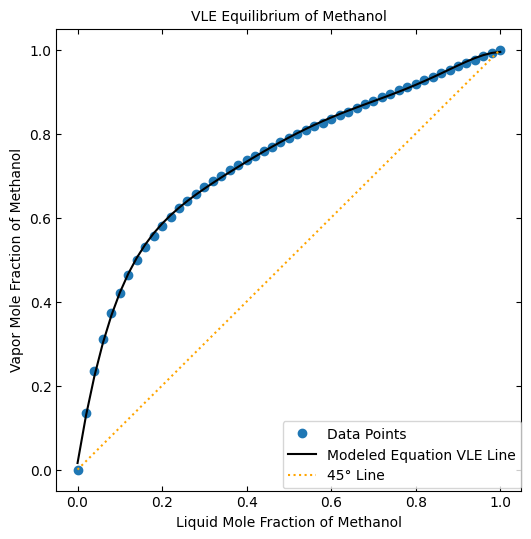

In [9]:
liqvapy = liq_vap_data["vapor mole frac methanol"]
liqvapx = liq_vap_data["liquid mole frac methanol"]

# Feature matrix (store in 'X')
X = np.column_stack([np.ones(len(liqvapx))] + [liqvapx**i for i in range(1, 7)])
Y = np.array(liqvapy)

# Calculate regression coefficients
beta_hat = calculate_regression_coefficients(X, Y)

# Separate data preparation from plotting
x = liqvapx
y = X.dot(beta_hat)

# create empty lists to store x and y coordinates for the VLE equilibrium graph
x = liqvapx
liqvapy = liqvapy

def VLE_eq(x):
    """plot the "stair case" line of the McCabe-Thiele diagram

    Arguments:
        x: x value on the VLE diagram

    Returns:
        liqvap: y value on the VLE diagram

    """
    liqvap = (
        beta_hat[0]
        + beta_hat[1] * x
        + beta_hat[2] * x**2
        + beta_hat[3] * x**3
        + beta_hat[4] * x**4
        + beta_hat[5] * x**5
        + beta_hat[6] * x**6
    )
    return liqvap


y = VLE_eq(x)

# Plot the VLE line
fig = plt.figure(figsize=(6, 6))
plt.plot(liqvapx, liqvapy, "o", label="Data Points")
plt.plot(x, y, color="black", label="Modeled Equation VLE Line")
plt.plot([0, 1], [0, 1], color="orange", linestyle=":", label="45° Line")
plt.xlabel("Liquid Mole Fraction of Methanol", fontsize=10)
plt.ylabel("Vapor Mole Fraction of Methanol", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(direction="in", top=True, right=True)
plt.title("VLE Equilibrium of Methanol", fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1.0, 0.15), borderaxespad=0)
plt.show()


## 3.3. Plot the McCabe-Thiele for a total reflux run

## 3.3.a. Stepping line

The stepping line connects the points that represent the mole fraction of Methanol in each stage of the distillation column. It starts at the bottom mole fraction of Methanol on the 45 line and ends after reaching the mole fraction of Methanol in the distillate on the 45 line.

![](../../media/MCabe_thiele_stepping_line.png)

Create a function that is able to generate the points requried to plot the stepping line.

In [10]:
def stair(slope, y_intercept, x_start, y_start, y_end, Efficiency=1):

    """plot the "stair case" line of the McCabe-Thiele diagram

    Arguments:
        slope: slope of the line compared to the vapor-liquid equilibrium line
        y_intercept: y_intercept of the line compared to the vapor-liquid equilibrium line
        x_start: the bottom mole fraction of Methanol
        y_start: the mole fraction of the Methanol
        y_end: the distillate mole fraction of the mixture

    Returns:
        xplot: x cordinates of the stair case
        yplot: y cordinates of the stair case
        n: number of stages in the distillation column

    """
    # establish arrays for the "stair case"
    xplot = []
    yplot = []

    # first point on 45 line
    x = x_start
    y = y_start
    xplot.append(x)
    yplot.append(y)

    # initial number of stages
    n = 0

    ### BEGIN SOLUTIONS

    # while the mole fraction is less than the distillate product
    while y < y_end:
        xplot.append(x)
        # create the equation from slope and y-intercept of equation
        equation = slope * x + y_intercept
        y = ((VLE_eq(x)) - equation) * Efficiency + equation
        yplot.append(y)
        x = (y - y_intercept) / slope
        # sol=solve(Equation)
        # x=sol[0]

        # append points to list
        xplot.append(x)
        yplot.append(y)

        # counts the number of stages
        n += 1
    return (xplot, yplot, n)
    ### END SOLUTIONS

## 3.3.b. McCabe-Thiele for a total reflux run

In a total reflux run, there are no feed entering the column and no product leaving the column. The distillate is all refluxed back into the top of the column. The stepping line is plotted along the 45 degree line and the vapor-liquid equilibrium line.

The number of total theoretical stage is  4


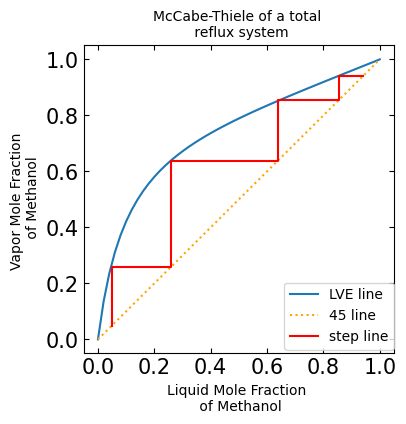

In [11]:
### BEGIN SOLUTIONS

# slope and y-intercept of the 45 degree line
slope = 1
y_intercept = 0
Efficiency = 1

# call stair funciton to generate the points needed to plot
complete_reflux = stair(slope=1, y_intercept=0, x_start=xB, y_start=xB, y_end=xD)
# extract x and y points for the plot
xplot = complete_reflux[0]
yplot = complete_reflux[1]
total_stage = complete_reflux[2]
print("The number of total theoretical stage is ", total_stage)

# McCabe-Thiele diagram
fig = plt.figure(figsize=(4, 4))
# plot the LVE line
plt.plot(liqvapx, liqvapy)
# plot the 45 degree line
plt.plot([0, 1], [0, 1], color="orange", linestyle=":")
# plot the VLE line
plt.plot(xplot, yplot, color="red")
plt.xlabel("Liquid Mole Fraction \n of Methanol", fontsize=10)
plt.ylabel("Vapor Mole Fraction \n of Methanol", fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in", top=True, right=True)
plt.title("McCabe-Thiele of a total \n reflux system", fontsize=10)
plt.legend(
    labels=("LVE line", "45 line", "step line"),
    fontsize=10,
    bbox_to_anchor=(1.0, 0.23),
    borderaxespad=0,
)
plt.show()

### END SOLUTIONS

## 4. Plot the McCabe-Thiele diagram of a feed run

In a more realistic sense, there will be mixture feed entering the column to be separated. As a result, there will also be a distillate stream and a bottoms stream. When there are feed entering the column and product leaving the column, the McCabe-Thiele diagram will have the feed condition (q) line, rectifying line, and stripping line. The rectifying starts at the distillate mole fraction of Methanol and comes down until it corsses the q-line. The q-line starts at the feed mole fraction of Methanol and meets the stripping and rectifying line. The stripping line starts at the bottom mole fraction of Methanol and meets the q-line and rectifying line.  

![](../../media/MCabe_thiele_diagram.png)

## 4.1. Solve for the slope of the q and rectifying line

Using the relationship below, calculate the slope of the q and rectifying line. q is the mole fraction of liquid in the feed stream and R is the reflux ratio. Store the slope of q-line as **m_q** and slope of rectifying operating line as **m_rec**


\begin{align}
        m_{feed} = \frac{q}{ q - 1 }
    \end{align}

\begin{align}
        m_{rec} = \frac{R}{ R + 1 }        
    \end{align}



In [12]:
# Mole fraction of liquid in feed
q = 0.3
# Reflux Ratio
R = 1

### BEGIN SOLUTIONS

# slope of rectifying opearting line
m_rec = R / (R + 1)
# slope of feed condition line (q-line)
m_q = q / (q - 1)

### END SOLUTIONS

## 4.2. Intercept of the q-line and the rectifying line, and calculate the slope and y-intercept of the stripping line

To find the intercept of the q-line and the rectifying line, the point-slope equation of the q-line and the rectifying line can be turned into slope-interecept form and made into a system of linear equations.

\begin{equation}
        y-y_q = m_q(x-x_q)
\end{equation}

\begin{align}
        y-y_{rec} = m_{rec}(x-x_{rec})
\end{align}


Matrix form:

\begin{equation}
\begin{bmatrix}
m_{rec} & -1\\
m_{q} & -1
\end{bmatrix} \cdot
\begin{bmatrix}
	x  \\
	y
\end{bmatrix} =
\begin{bmatrix}
	m_{rec}*x_{rec} - y_{rec}  \\
	m_{q} *x_q - y_q
\end{bmatrix}
\end{equation}

After calculating the intercept, we have two points of the stripping line to calculate the slope and y-intercept to get the slope-intercept form of the equation.

In [13]:
### BEGIN SOLUTIONS

# solve for the  intercept of the rectifying line and q-line
a = np.array([[m_rec, -1], [m_q, -1]])
b = np.array([m_rec * xD - xD, m_q * xZ - xZ])
intercept = np.linalg.solve(a, b)

# solve for stripping operating line slope and y-intercept
m_strip = (intercept[1] - xB) / (intercept[0] - xB)
y_intercept_strip = xB * (1 - m_strip)

# y-intercept of the rectifying opearting line
y_intercept_rec = xD * (1 - m_rec)

### END SOLUTIONS

## 4.3. Generate the points needed to plot the stepping line, plot the McCabe-Thiele diagram, and calculate the number of stages

Think where you want the "stair" to stop on your plot when you enter the y_start and y_end for the function.  

In [14]:
### BEGIN SOLUTIONS

# McCabe-Thiele of a feed run
# stripping portion of stepping line generation
stripping_line = stair(
    slope=m_strip,
    y_intercept=y_intercept_strip,
    x_start=xB,
    y_start=xB,
    y_end=intercept[1],
)
xplot_stripping = stripping_line[0]
yplot_stripping = stripping_line[1]

# rectifying portion of stepping line generation
rectifying_line = stair(
    slope=m_rec,
    y_intercept=y_intercept_rec,
    x_start=(yplot_stripping[-1] - y_intercept_rec) / m_rec,
    y_start=yplot_stripping[-1],
    y_end=xD,
)
xplot_rectifying = rectifying_line[0]
yplot_rectifying = rectifying_line[1]

# complie the x and y points to respective lists
xplot = xplot_stripping + xplot_rectifying
yplot = yplot_stripping + yplot_rectifying

### END SOLUTIONS

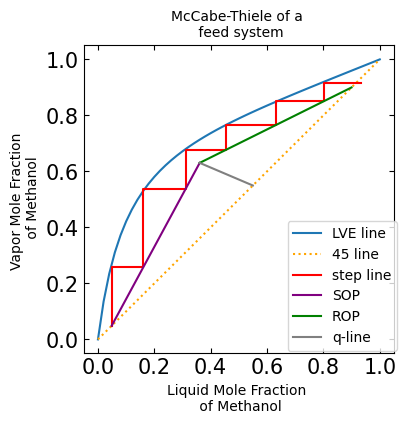

The number of total theoretical stage is  6


In [15]:
### BEGIN SOLUTIONS

# McCabe-Thiele diagram
fig = plt.figure(figsize=(4, 4))
# plot the LVE line
plt.plot(liqvapx, liqvapy)
# plot the 45 degree line
plt.plot([0, 1], [0, 1], color="orange", linestyle=":")
# plot the step line
plt.plot(xplot, yplot, color="red")
# plot the SOP
plt.plot([xB, intercept[0]], [xB, intercept[1]], color="purple")
# plot the ROP
plt.plot([xD, intercept[0]], [xD, intercept[1]], color="green")
# plot the q-line
plt.plot([xZ, intercept[0]], [xZ, intercept[1]], color="grey")
# Formating the plot
plt.xlabel("Liquid Mole Fraction \n of Methanol", fontsize=10)
plt.ylabel("Vapor Mole Fraction \n of Methanol", fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in", top=True, right=True)
plt.title("McCabe-Thiele of a \n feed system", fontsize=10)
plt.legend(
    labels=("LVE line", "45 line", "step line", "SOP", "ROP", "q-line"),
    fontsize=10,
    bbox_to_anchor=(1.01, 0.43),
    borderaxespad=0,
)
plt.show()
total_stage = stripping_line[2] + rectifying_line[2]
print("The number of total theoretical stage is ", total_stage)

### END SOLUTIONS

## 5. Discussion Question 1
From the McCabe-Thiele diagram plotted above what can we say about the phase of the feed stream? **Hint: Look at the slope of the q-line.**

![](../../media/MCabe_thiele_q1.png)

**Your Answer:**

Since the q-line slope is between 0 and -1, it tells us that the feed stream is mostly a vapor feed. This conclusion is in line with the problem statement where q, the mole fraction of liquid, is 0.36, which means the feed is mostly vapor.

In [16]:
### BEGIN SOLUTIONS
"""
Since the q-line slope is between 0 and -1, it tells us that the feed stream is mostly a vapor feed.
This conclusion is in line with the problem statement where q, the mole fraction of liquid, is 0.36, which means the feed is mostly vapor.
"""
print(" ")
### END SOLUTIONS

## 6. Discussion Question 2

Why is the McCabe-Thiele diagram plotted above is unrealistic in the real world? What would you change to make the plot more realistic. Plot the modified plot and talk about how the number of stages changed. **Hint: Think efficiency. Is there ever 100% efficiency in the real world? A distillation column typically have a efficiency of 60%.**

**Your Answer:**

In [17]:
### BEGIN SOLUTION
""" The diagram plotted above uses 100% efficiency in the column.
Since 100% efficiency is not possible in the real world, it makes the plot above unrealistic.
A more realistic plot would use a efficiency of around 60% like the one plotted below.
The number of stages increased from 5 to 9, which makes sense because less efficiency means more stages are required.
"""
print()
### END SOLUTION

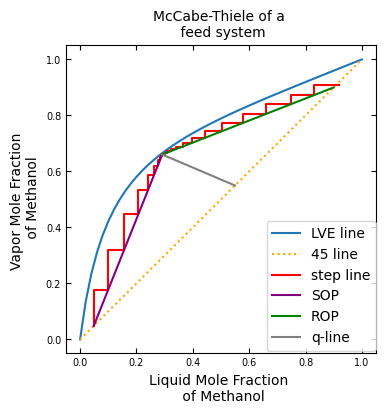

The number of total theoretical stage is  24


In [41]:
# Efficency

### BEGIN SOLUTIONS
efficiency = 0.6
### END SOLUTIONS

# McCabe-Thiele of a feed run
# stripping portion of stepping line generation
stripping_line = stair(
    slope=m_strip,
    y_intercept=y_intercept_strip,
    x_start=xB,
    y_start=xB,
    y_end=intercept[1],
    Efficiency=efficiency,
)
xplot_stripping = stripping_line[0]
yplot_stripping = stripping_line[1]

# rectifying portion of stepping line generation
rectifying_line = stair(
    slope=m_rec,
    y_intercept=y_intercept_rec,
    x_start=(yplot_stripping[-1] - y_intercept_rec) / m_rec,
    y_start=yplot_stripping[-1],
    y_end=xD,
    Efficiency=efficiency,
)
xplot_rectifying = rectifying_line[0]
yplot_rectifying = rectifying_line[1]

# complie the x and y points to respective liststogether
xplot = xplot_stripping + xplot_rectifying
yplot = yplot_stripping + yplot_rectifying


# McCabe-Thiele diagram
fig = plt.figure(figsize=(4, 4))
# plot the LVE line
plt.plot(liqvapx, liqvapy)
# plot the 45 degree line
plt.plot([0, 1], [0, 1], color="orange", linestyle=":")
# plot the step line
plt.plot(xplot, yplot, color="red")
# plot the SOP
plt.plot([xB, intercept[0]], [xB, intercept[1]], color="purple")
# plot the ROP
plt.plot([xD, intercept[0]], [xD, intercept[1]], color="green")
# plot the q-line
plt.plot([xZ, intercept[0]], [xZ, intercept[1]], color="grey")
# Formating the plot
plt.xlabel("Liquid Mole Fraction \n of Methanol", fontsize=10)
plt.ylabel("Vapor Mole Fraction \n of Methanol", fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tick_params(direction="in", top=True, right=True)
plt.title("McCabe-Thiele of a \n feed system", fontsize=10)
plt.legend(
    labels=("LVE line", "45 line", "step line", "SOP", "ROP", "q-line"),
    fontsize=10,
    bbox_to_anchor=(1.0, 0.43),
    borderaxespad=0,
)
plt.show()
total_stage = stripping_line[2] + rectifying_line[2]
print("The number of total theoretical stage is ", total_stage)

##7. Discussion Question 3: Evaluating the minimum reflux rate of the system (Graphical)

Under the conditions given by the problem statement, what is the theoretical minimum reflux of the system? And describe how you would find this. Hint: At the minimum reflux rate, it would require infinite number of stage to achieve separation. **Do this by hand and submit**

---



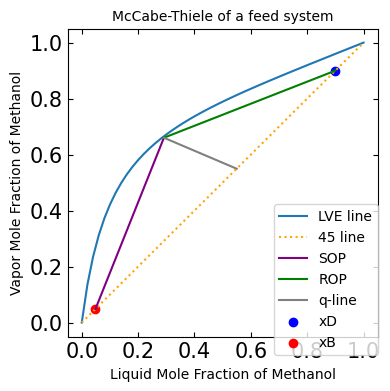

In [40]:
# Mole fraction of Feed
xZ = float(conc_solver(SG_Z))

# Mole fraction of Distillate
xD = float(conc_solver(SG_D))

# Mole fraction of Bottoms
xB = float(conc_solver(SG_B))

##BEGIN SOLUTION

# Mole fraction of liquid in feed
q = 0.3
# Reflux Ratio
R = 0.65

""" The total reflux gives out the maximum number of reflux that can be theoretically achieved for a given system; this was discussed in discussion 5.
The minimum reflux is the opposite, as the reflux rate gets smaller, the q-line and the operating line gets closer to the VLE line. Therefore, N gets larger as it requires more stepping to reach xD
Graphically, this is where the q-line intersects with the VLE line given a specified q.
In traditional chemical engineering term, this is called a "Pinch"
"""

###END SOLUTION

# slope of rectifying opearting line
m_rec = R / (R + 1)
# slope of feed condition line (q-line)
m_q = q / (q - 1)


# solve for the  intercept of the rectifying line and q-line
a = np.array([[m_rec, -1], [m_q, -1]])
b = np.array([m_rec * xD - xD, m_q * xZ - xZ])
intercept = np.linalg.solve(a, b)
# solve for stripping operating line slope and y-intercept
m_strip = (intercept[1] - xB) / (intercept[0] - xB)
y_intercept_strip = xB * (1 - m_strip)

# y-intercept of the rectifying opearting line
y_intercept_rec = xD * (1 - m_rec)

# McCabe-Thiele diagram
fig = plt.figure(figsize=(4, 4))

# plot the LVE line
plt.plot(liqvapx, liqvapy)

# plot the 45 degree line
plt.plot([0, 1], [0, 1], color="orange", linestyle=":")

# plot the SOP
plt.plot([xB, intercept[0]], [xB, intercept[1]], color="purple")
# plot the ROP
plt.plot([xD, intercept[0]], [xD, intercept[1]], color="green")
# plot the q-line
plt.plot([xZ, intercept[0]], [xZ, intercept[1]], color="grey")

# Add points for xD and xB
plt.scatter(xD, xD, color="blue", label="xD")
plt.scatter(xB, xB, color="red", label="xB")

# Formating the plot
plt.xlabel("Liquid Mole Fraction of Methanol", fontsize=10)
plt.ylabel("Vapor Mole Fraction of Methanol", fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in", top=True, right=True)
plt.title("McCabe-Thiele of a feed system", fontsize=10)
plt.legend(
    labels=("LVE line", "45 line", "SOP", "ROP", "q-line", "xD", "xB"),
    fontsize=10,
    bbox_to_anchor=(1.0, 0.43),
    borderaxespad=0,
)
plt.show()

# print(intercept)
# print(m_q)

# print(xB)
# print(xD)

##8. Discussion Question 4: Evaluating the minimum reflux of the system (Newton's method)

Now that we have graphically identified the location of the pinch, we can employ our data science skills to precisely pinpoint this critical point. As previously mentioned, the pinch occurs at the intersection of the q-line and the VLE line. At this intersection, we can determine the minimum reflux ratio, R_min, by finding the slope of the ROP line.

To approach this problem computationally, we can use numerical methods, such as Newton's method, to find the solution where the VLE line and the q-line intersect. The goal is to determine the composition at this intersection point, which corresponds to the exact location of the pinch and allows us to calculate R_min

1. Define the VLE curve equation

2. Define the q-line equation

3. Implement Newton's method to find the intersection point of the VLE curve and the q-line. This intersection point corresponds to the pinch location.

4. Once the intersection point is found (x0, y0), calculate R_min using the formula:
   


Approximate intersection point: 0.2890625846948517
Approximate y-coordinate: 0.6612101117858299


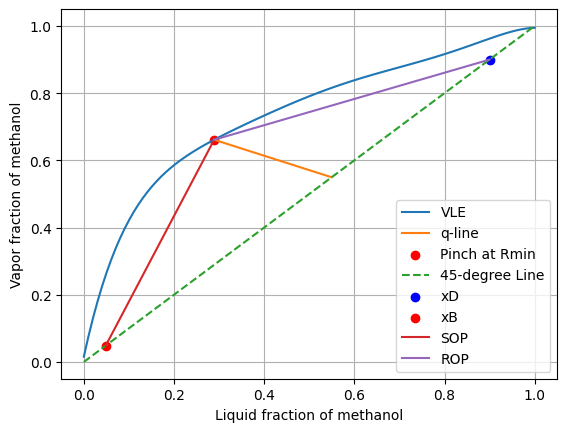

R_min is:  0.6409329047427269


In [44]:
import numpy as np


#defining the VLE-line
def polynomial(x):

    liqvap = (
        beta_hat[0]
        + beta_hat[1] * x
        + beta_hat[2] * x**2
        + beta_hat[3] * x**3
        + beta_hat[4] * x**4
        + beta_hat[5] * x**5
        + beta_hat[6] * x**6
    )
    return liqvap

# Define the equation of the q-line
def line(x):
    return m_q*x + xZ/(1-q)

# Define the derivative of the polynomial function
def polynomial_derivative(x):
    """Calculate the derivative of the polynomial function.

    Arguments:
        x: x value on the VLE diagram

    Returns:
        liqvap_derivative: Derivative of the polynomial at x
    """

    ###BEGIN SOLUTION
    liqvap_derivative = (
        beta_hat[1]
        + 2 * beta_hat[2] * x
        + 3 * beta_hat[3] * x**2
        + 4 * beta_hat[4] * x**3
        + 5 * beta_hat[5] * x**4
        + 6 * beta_hat[6] * x**5
    )

    ###END SOLUTION
    return liqvap_derivative

# Initial guess for the intersection point
x0 = 0.0

# Set a tolerance level for the approximation
tolerance = 1e-6

# Maximum number of iterations
max_iterations = 100

# Newton's method to find the intersection

###BEGIN SOLUTION
for i in range(max_iterations):
    f_x0 = polynomial(x0) - line(x0)
    if abs(f_x0) < tolerance:
        break
    x0 = x0 - f_x0 / polynomial_derivative(x0)
###END SOLUTION

# Check if the maximum number of iterations is reached
if i == max_iterations - 1:
    print("Maximum iterations reached without convergence.")
else:
    print("Approximate intersection point:", x0)
    print("Approximate y-coordinate:", line(x0))

# Plot the polynomial
x_values = np.linspace(0, 1, 100)  # Adjust the range and number of points as needed
polynomial_values = [polynomial(x) for x in x_values]

#plotting the line
plt.plot(x_values, polynomial_values, label="VLE")
x_values_line = np.linspace(x0,xZ,100)
line_values = [line(x) for x in x_values_line]
plt.plot(x_values_line, line_values, label="q-line")


plt.scatter(x0, line(x0), color="red", label="Pinch at Rmin", marker="o")



# Add a 45-degree line
fortyfive_deg_line = [x for x in x_values]

#plot of the 45 degree line
plt.plot(x_values, fortyfive_deg_line, label="45-degree Line", linestyle="--")

#plot of xD point
plt.scatter(xD, xD, color="blue", label="xD")

#plot of xB point
plt.scatter(xB, xB, color="red", label="xB")

#plotting SOP line
plt.plot([xB,x0],[xB,line(x0)],label="SOP")

#plotting ROP line
plt.plot([xD,x0],[xD,line(x0)], label="ROP")

#labelling
plt.xlabel("Liquid fraction of methanol")
plt.ylabel("Vapor fraction of methanol")
plt.legend()
plt.grid()
plt.show()

R_min = (xD - line(x0))/(line(x0) - x0)

print("R_min is: ",R_min)

R min calculated by this and graphically should not be that far off.